In [1]:
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
from niipreprocess10 import  niipreprocess as npp
#from pandas_profiling import ProfileReport
import os
import glob
import warnings
warnings.filterwarnings("ignore")

2022-07-20 17:23:40.709545 v10.0


In [2]:
import pandas as pd
import glob
files = glob.glob("C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_Training_Data_v2_csv/*.csv")

df = pd.DataFrame()
for index,f in enumerate(files):
    if index <=35:
        csv = pd.read_csv(f)
        df = pd.concat([df,csv])

In [3]:
b_dataset = df
#df1 = df[[df.query('istumor == 1')]]

In [4]:
#b_dataset.NiiFileName.unique()
b_dataset['istumor'].value_counts()


0    56259211
1         216
Name: istumor, dtype: int64

In [5]:
#test_dataset['istumor'].value_counts().plot.bar()
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = b_dataset[(b_dataset['istumor']==0)] 
df_minority = b_dataset[(b_dataset['istumor']==1)] 
print(len(df_majority))
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= len(df_majority), # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

56259211


coutn of class 1    56259211
0    56259211
Name: istumor, dtype: int64


<AxesSubplot:>

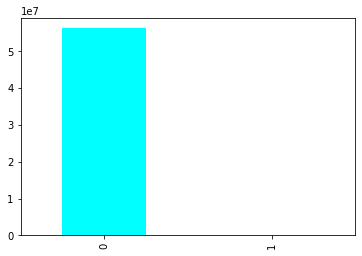

In [6]:
print("coutn of class {}".format(df_upsampled['istumor'].value_counts()))
b_dataset['istumor'].value_counts().plot.bar(color=['cyan','orange'])


<AxesSubplot:>

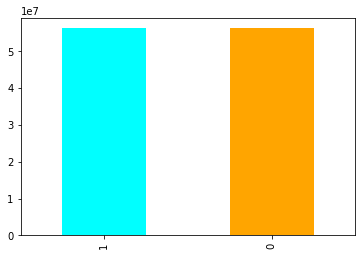

In [7]:
df_upsampled['istumor'].value_counts().plot.bar(color=['cyan','orange'])

In [8]:
test_dataset = pd.read_csv('C:/Drive/Dissertation/OneDrive_1_23-06-2022/BraTSReg_Validation_Data_csv/BraTSReg_141_01_0505_t1ce_values.csv')

In [9]:
X = df_upsampled[['X','pY','VoxVal','Z']]
y = df_upsampled[['istumor']]

In [10]:
X_test = test_dataset[['X','pY','VoxVal','Z']]
y_test = test_dataset[['istumor']]

In [11]:
# define the keras model
model = Sequential()
model.add(Dense(12, input_shape=(4,),kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(8,kernel_initializer = 'uniform', activation='relu'))
model.add(Dense(1,kernel_initializer = 'uniform', activation='sigmoid'))

In [12]:
# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
# fit the keras model on the dataset
epoch_history = model.fit(X, y, epochs=50, batch_size=500000,validation_split=0.2)

Epoch 1/50
181/181 [==============================] - 37s 142ms/step - loss: 0.4260 - accuracy: 0.7810 - val_loss: 0.4800 - val_accuracy: 0.8257
Epoch 2/50
181/181 [==============================] - 25s 126ms/step - loss: 0.3327 - accuracy: 0.8410 - val_loss: 0.3781 - val_accuracy: 0.8601
Epoch 3/50
181/181 [==============================] - 27s 126ms/step - loss: 0.2969 - accuracy: 0.8533 - val_loss: 0.3787 - val_accuracy: 0.8456
Epoch 4/50
181/181 [==============================] - 27s 128ms/step - loss: 0.2892 - accuracy: 0.8583 - val_loss: 0.3648 - val_accuracy: 0.8481
Epoch 5/50
181/181 [==============================] - 28s 132ms/step - loss: 0.2827 - accuracy: 0.8597 - val_loss: 0.3715 - val_accuracy: 0.8437
Epoch 6/50
181/181 [==============================] - 26s 126ms/step - loss: 0.2780 - accuracy: 0.8623 - val_loss: 0.3293 - val_accuracy: 0.8701
Epoch 7/50
181/181 [==============================] - 27s 127ms/step - loss: 0.2723 - accuracy: 0.8680 - val_loss: 0.3689 - val_ac

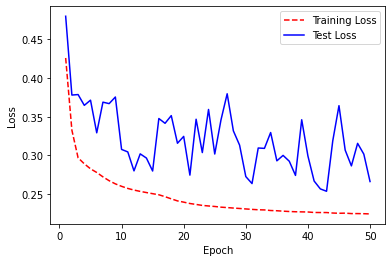

In [14]:
# Get training and test loss histories
training_loss = epoch_history.history['loss']
test_loss = epoch_history.history['val_loss']

# Create count of the number of epochs
epoch_count = range(1, len(training_loss) + 1)

# Visualize loss history
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, test_loss, 'b-')
plt.legend(['Training Loss', 'Test Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

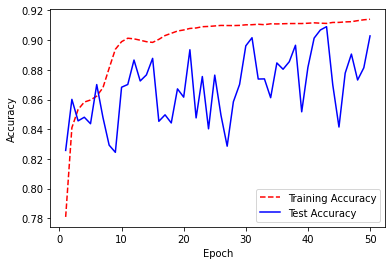

In [15]:
# Get training and test accuracy histories
training_accuracy = epoch_history.history['accuracy']
test_accuracy = epoch_history.history['val_accuracy']

# Create count of the number of epochs
epoch_count = range(1, len(training_accuracy) + 1)

# Visualize accuracy history
plt.plot(epoch_count, training_accuracy, 'r--')
plt.plot(epoch_count, test_accuracy, 'b-')
plt.legend(['Training Accuracy', 'Test Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [16]:
# evaluate the keras model
_, accuracy = model.evaluate(X, y,batch_size = 32)
print('Accuracy: %.2f' % (accuracy*100))

3516201/3516201 [==============================] - 4954s 1ms/step - loss: 0.2332 - accuracy: 0.9189
Accuracy: 91.89


In [17]:
predictions = model.predict(X_test,batch_size = 32)
test_dataset['istumor_Pred'] = predictions

47899/47899 [==============================] - 61s 1ms/step


In [20]:
test_dataset.query('istumor_Pred >= 0.999999 | istumor == 1').sort_values(['istumor'],ascending=False)

,Unnamed: 0,X,pY,VoxVal,Z,NiiFileName,LandmarksFileName,istumor,istumor_Pred
470361,45496,136,189,416.500977,58,BraTSReg_141_01_0505_t1ce.nii.gz,BraTSReg_001_00_0000_landmarks.csv,1,0.002714
855570,36405,165,151,665.296570,80,BraTSReg_141_01_0505_t1ce.nii.gz,BraTSReg_001_00_0000_landmarks.csv,1,0.080942
596329,28176,96,117,508.371704,66,BraTSReg_141_01_0505_t1ce.nii.gz,BraTSReg_001_00_0000_landmarks.csv,1,0.113841
942248,28903,103,120,1105.026367,85,BraTSReg_141_01_0505_t1ce.nii.gz,BraTSReg_001_00_0000_landmarks.csv,1,0.891448
1356271,27709,109,115,651.657043,111,BraTSReg_141_01_0505_t1ce.nii.gz,BraTSReg_001_00_0000_landmarks.csv,1,0.016396
...,...,...,...,...,...,...,...,...,...
1316118,24794,74,103,2893.317383,108,BraTSReg_141_01_0505_t1ce.nii.gz,BraTSReg_001_00_0000_landmarks.csv,0,0.999999
1316645,25991,71,108,2918.681641,108,BraTSReg_141_01_0505_t1ce.nii.gz,BraTSReg_001_00_0000_landmarks.csv,0,1.000000
1316646,25992,72,108,3023.881836,108,BraTSReg_141_01_0505_t1ce.nii.gz,BraTSReg_001_00_0000_landmarks.csv,0,1.000000
1316647,25993,73,108,2913.518066,108,BraTSReg_141_01_0505_t1ce.nii.gz,BraTSReg_001_00_0000_landmarks.csv,0,1.000000


In [21]:
from keras.models import load_model

model.save('dlmlp35t1ce_9182.h5')

In [23]:
#precision 
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(test_dataset['istumor'],test_dataset['istumor_Pred'].round()))
print(confusion_matrix(test_dataset['istumor'], test_dataset['istumor_Pred'].round()))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90   1532742
           1       0.00      0.25      0.00         8

    accuracy                           0.82   1532750
   macro avg       0.50      0.54      0.45   1532750
weighted avg       1.00      0.82      0.90   1532750

[[1262475  270267]
 [      6       2]]
